What i want to find is:
<ul>
    <li>correlation of type_of_school to bmi_status</li>
    <li>separate age groups and their bmi status</li>
</ul>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get student data csv
student_data = pd.read_csv('students_data.csv')

# save it as a pd dataframe
pd_student_data = pd.DataFrame(student_data)

In [12]:
# bmi
pd_student_data["height_in_m"] = pd_student_data["height_in_cm"] / 100
pd_student_data["bmi"] = pd_student_data["weight_in_kg"] / pd_student_data["height_in_m"] ** 2

# bmi status code:
def bmi_status(bmi):
    if(bmi < 18.5):
        return 'Underweight'
    elif(bmi >= 18.5 and bmi <= 24.9):
        return 'Normal'
    elif(bmi >= 25 and bmi <= 29.9):
        return 'Overweight'
    else:
        return 'Obese'

# applies our bmi_status function here and adds it to a new column also called
# bmi_status
pd_student_data["bmi_status"] = pd_student_data["bmi"].apply(bmi_status)

Text(0, 0.5, 'Count per Category')

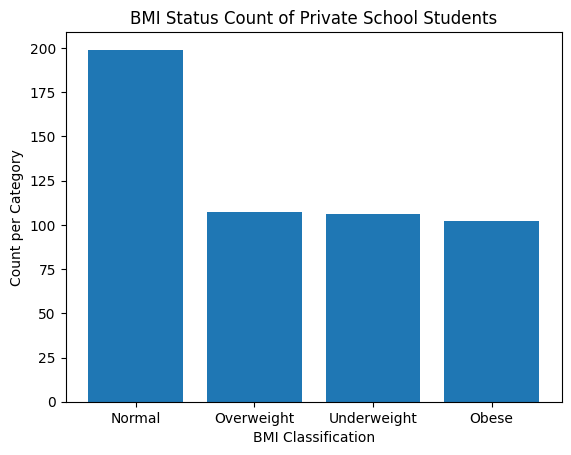

In [13]:
# private school's bmi
priv_school = pd_student_data[pd_student_data["type_of_school"] == "private"]
priv_school_bmi = priv_school["bmi_status"].value_counts()

plt.bar(priv_school_bmi.index, priv_school_bmi.values)
plt.title("BMI Status Count of Private School Students")
plt.xlabel("BMI Classification")
plt.ylabel("Count per Category")

Text(0.5, 0, 'BMI Classification')

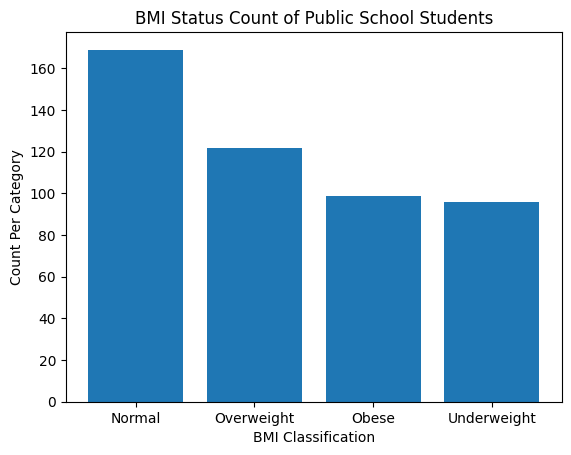

In [14]:
# public school bmi
pub_school = pd_student_data[pd_student_data["type_of_school"] == "public"]
pub_school_bmi = pub_school["bmi_status"].value_counts()

plt.bar(pub_school_bmi.index, pub_school_bmi.values)
plt.title("BMI Status Count of Public School Students")
plt.ylabel("Count Per Category")
plt.xlabel("BMI Classification")

In [ ]:
# graph for the types_of_schools and the percentage of each
total_pub = (pd_student_data["type_of_school"] == "public").sum()
total_priv = (pd_student_data["type_of_school"] == "private").sum()

# pivot table of: index bmi classifications, columns of type of school, and the count of each + percentage
pivot_table_std = pd_student_data.pivot_table(
    index=pd_student_data["bmi_status"], 
    columns=pd_student_data["type_of_school"], 
    values=pd_student_data["bmi_status"].value_counts()
)

print(pivot_table_std)

TypeError: agg function failed [how->mean,dtype->object]